# FakeNewsCorpus

## Setup and import libraries

In [1]:
# Automatically reloading imported modules
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.helpers import *

pd.set_option('display.max_columns', None)

In [3]:
# Change design of plots
sns.set(style="whitegrid")

# Change sizes and resolution of plots
plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 15})

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [4]:
df = pd.read_csv('data/data.csv', index_col=0)

## General descriptive analysis

Let's check shape of the data - number of rows and attributes:

In [5]:
df.shape

(250, 15)

Overview of the data:

In [6]:
df.head()

id                domain        type  \
0  141               awm.com  unreliable   
1  256     beforeitsnews.com        fake   
2  700           cnnnext.com  unreliable   
3  768               awm.com  unreliable   
4  791  bipartisanreport.com   clickbait   

                                                 url  \
0  http://awm.com/church-congregation-brings-gift...   
1  http://beforeitsnews.com/awakening-start-here/...   
2  http://www.cnnnext.com/video/18526/never-hike-...   
3  http://awm.com/elusive-alien-of-the-sea-caught...   
4  http://bipartisanreport.com/2018/01/21/trumps-...   

                                             content  \
0  Sometimes the power of Christmas will make you...   
1  AWAKENING OF 12 STRANDS of DNA – “Reconnecting...   
2  Never Hike Alone: A Friday the 13th Fan Film U...   
3  When a rare shark was caught, scientists were ...   
4  Donald Trump has the unnerving ability to abil...   

                   scraped_at                 inserted_at  \
0  2018-01-25 16:17:44.789555  2018-02-02 01:19:41.756632   
1  2018-01-25 16:17:44.789555  2018-02-02 01:19:41.756632   
2  2018-01-25 16:17:44.789555  2018-02-02 01:19:41.756632   
3  2018-01-25 16:17:44.789555  2018-02-02 01:19:41.756632   
4  2018-01-25 16:17:44.789555  2018-02-02 01:19:41.756632   

                   updated_at  \
0  2018-02-02 01:19:41.756664   
1  2018-02-02 01:19:41.756664   
2  2018-02-02 01:19:41.756664   
3  2018-02-02 01:19:41.756664   
4  2018-02-02 01:19:41.756664   

                                               title          authors  \
0  Church Congregation Brings Gift to Waitresses ...      Ruth Harris   
1  AWAKENING OF 12 STRANDS of DNA – “Reconnecting...     Zurich Times   
2  Never Hike Alone - A Friday the 13th Fan Film ...              NaN   
3  Elusive ‘Alien Of The Sea ‘ Caught By Scientis...  Alexander Smith   
4  Trump’s Genius Poll Is Complete & The Results ...  Gloria Christie   

   keywords meta_keywords                                   meta_description  \
0       NaN          ['']                                                NaN   
1       NaN          ['']                                                NaN   
2       NaN          ['']  Never Hike Alone: A Friday the 13th Fan Film  ...   
3       NaN          ['']                                                NaN   
4       NaN          ['']                                                NaN   

  tags  summary  
0  NaN      NaN  
1  NaN      NaN  
2  NaN      NaN  
3  NaN      NaN  
4  NaN      NaN

### Datatypes

**Note:** Be careful, attributes with only NaN values are considered as `float64` type by default.

In [7]:
df.dtypes

id                    int64
domain               object
type                 object
url                  object
content              object
scraped_at           object
inserted_at          object
updated_at           object
title                object
authors              object
keywords            float64
meta_keywords        object
meta_description     object
tags                 object
summary             float64
dtype: object

### Basic characteristics

In [8]:
df.describe()

id  keywords  summary
count    250.000000       0.0      0.0
mean   20241.560000       NaN      NaN
std    11515.412728       NaN      NaN
min      141.000000       NaN      NaN
25%    11033.500000       NaN      NaN
50%    21065.000000       NaN      NaN
75%    29073.750000       NaN      NaN
max    39558.000000       NaN      NaN

In [9]:
df.describe(exclude=[np.number])

domain  type  \
count                 250   238   
unique                 29    10   
top     beforeitsnews.com  fake   
freq                  155   155   

                                                      url  \
count                                                 250   
unique                                                250   
top     http://beforeitsnews.com/alternative/2016/10/u...   
freq                                                    1   

                                                  content  \
count                                                 250   
unique                                                239   
top     How To Easily Understand The Difference Betwee...   
freq                                                    9   

                        scraped_at                 inserted_at  \
count                          250                         250   
unique                           2                           1   
top     2018-01-25 16:17:44.789555  2018-02-02 01:19:41.756632   
freq                           197                         250   

                        updated_at              title     authors  \
count                          250                250         170   
unique                           1                248         109   
top     2018-02-02 01:19:41.756664  American Everyman  John Rolls   
freq                           250                  2          10   

       meta_keywords                                   meta_description  \
count            250                                                 54   
unique            36                                                 51   
top             ['']  News, Politics, Editorials, commentary, Canada...   
freq             211                                                  4   

                                                     tags  
count                                                  27  
unique                                                 24  
top     Donald Trump, Russia, Trump Administration, Gu...  
freq                                                    3

### One-value columns

Which attributes contain only one value?

In [10]:
one_value_attributes_analysis(df)

inserted_at
updated_at


### Missing values

Analysis of missing values in attributes:

type: 12 (4.8%)
authors: 80 (32.0%)
keywords: 250 (100.0%)
meta_description: 196 (78.4%)
tags: 223 (89.2%)
summary: 250 (100.0%)

Missing values plot (inverse logic, plot is showing how many values are not NaN):


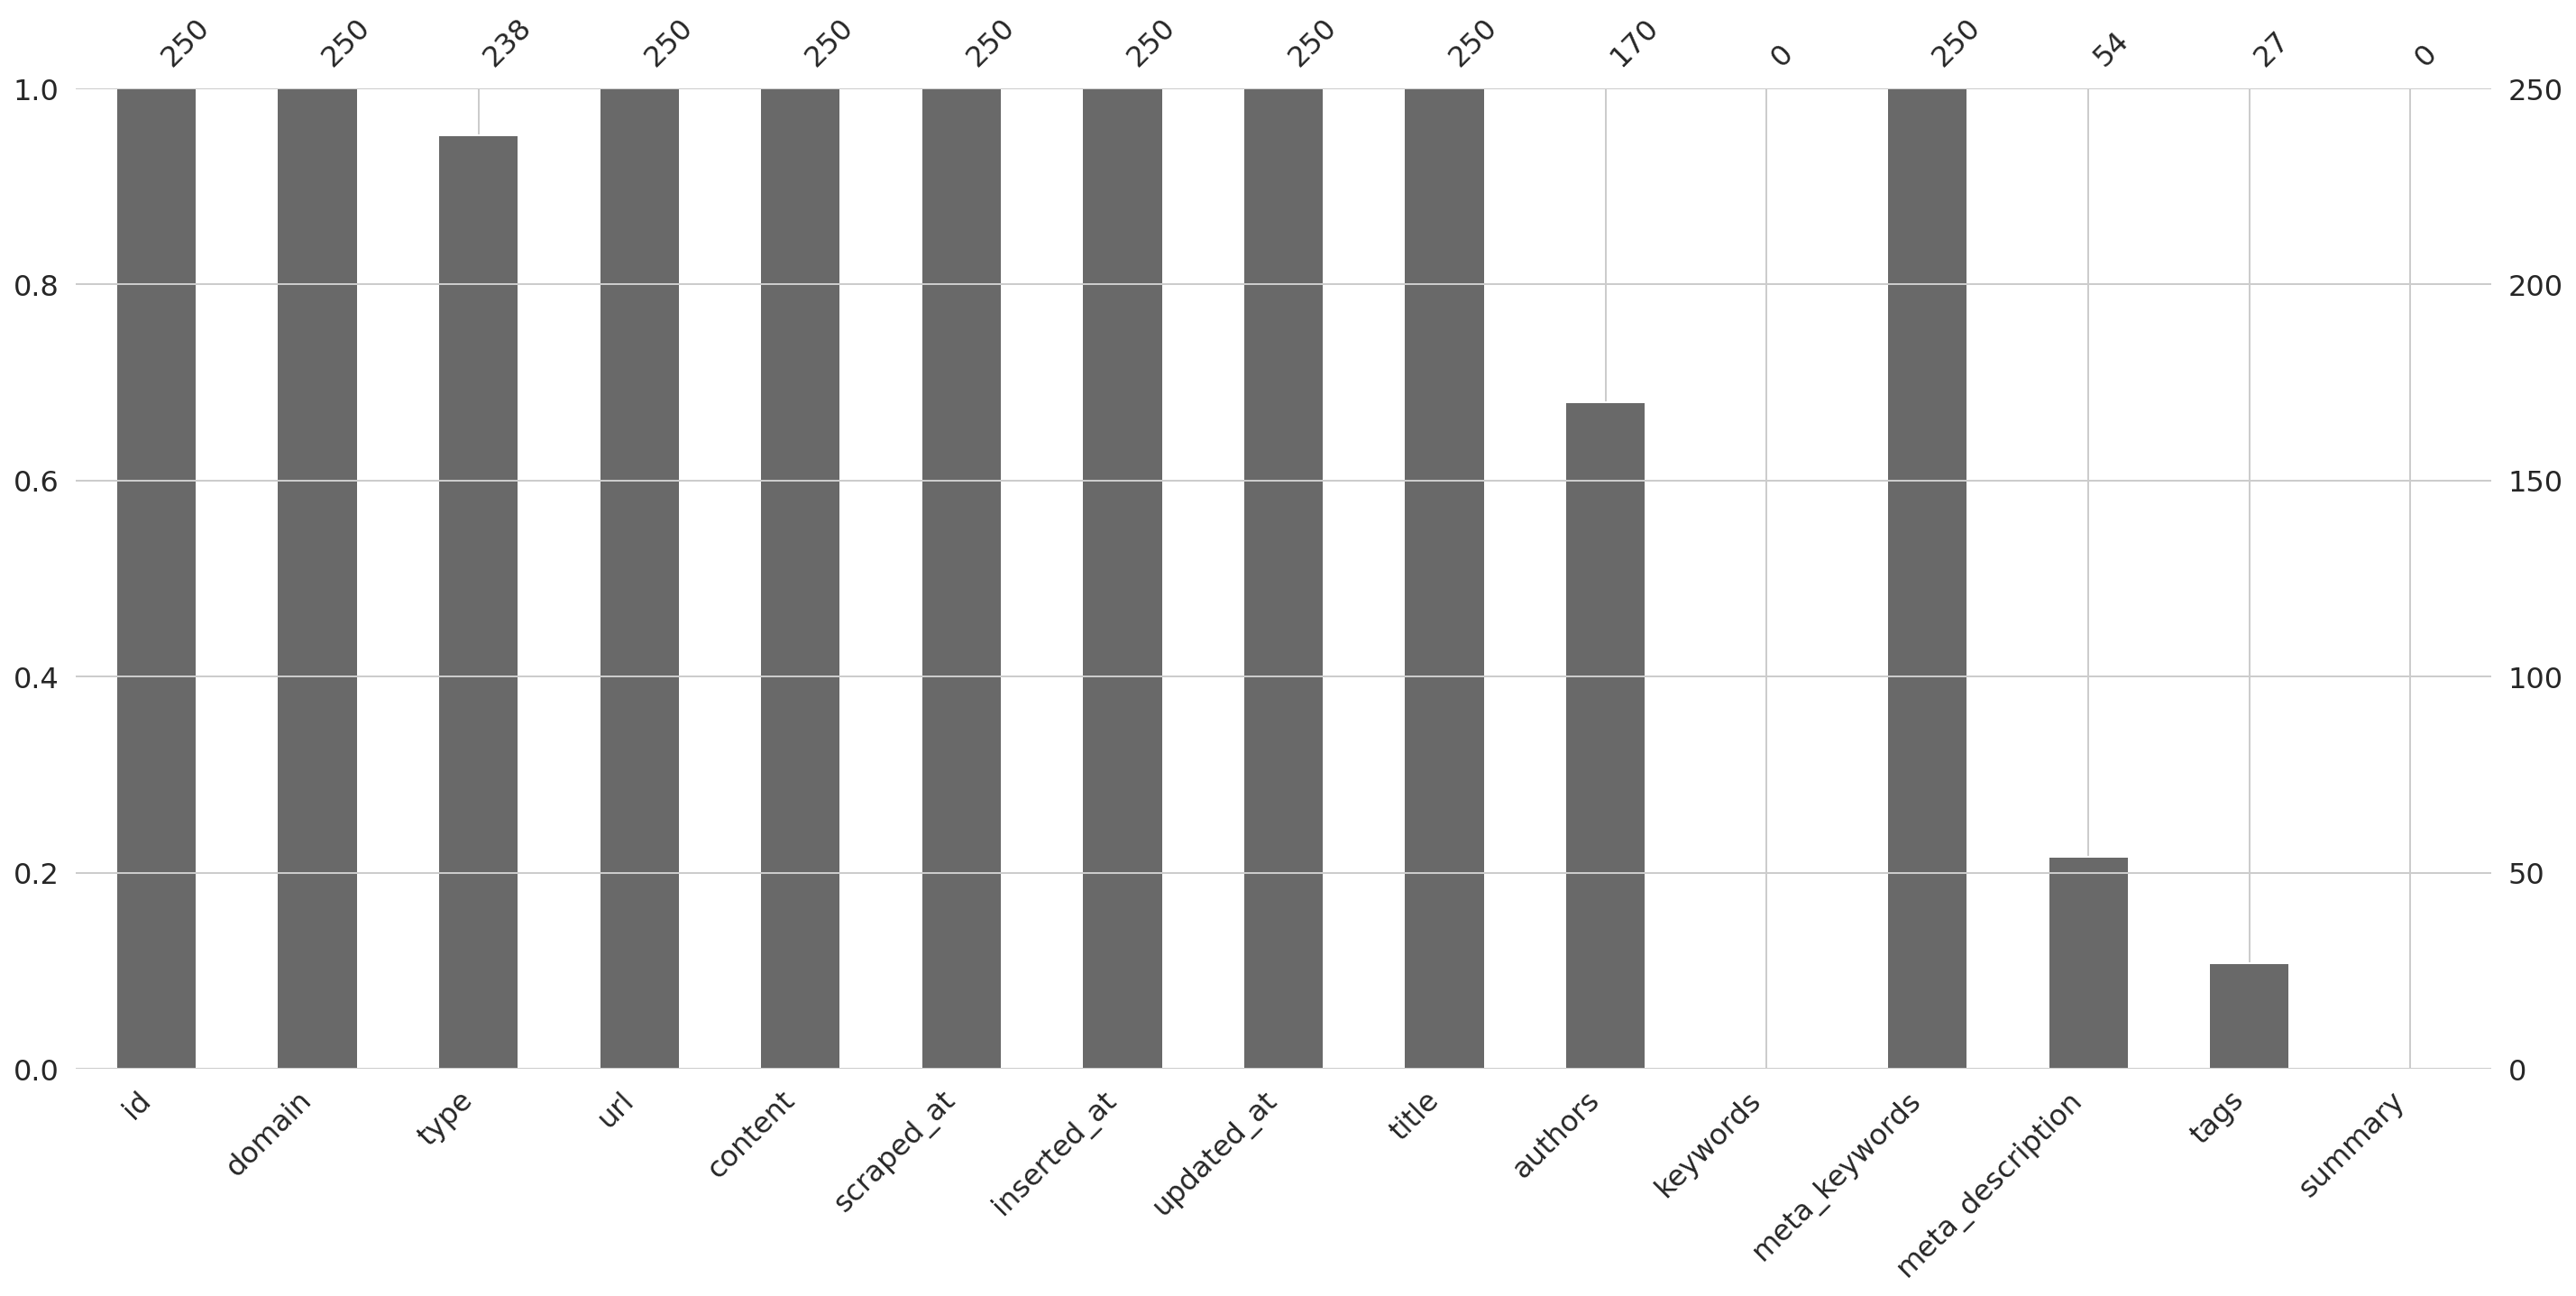

In [11]:
missing_values_analysis(df)

### Duplicates

Are there any duplicates?

In [12]:
df.duplicated().any()

False

## Attributes analysis

Analysis of all attributes:

In [13]:
skip_attributes = [
    'id', 'summary', 'keywords', 'scraped_at', 'updated_at', 'inserted_at', 'meta_keywords', 'tags'
] # attributes to skip in analysis (e.g. id)

textual_attributes = [
    'url', 'content', 'title', 'meta_description', 'authors'
] # attributes with text values (e.g. content of article)
textual_attributes = list(filter(lambda value: value not in skip_attributes, textual_attributes))

numerical_attributes = list(df.select_dtypes([np.number]).columns)
numerical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, numerical_attributes))

categorical_attributes = list(df.select_dtypes(['object', 'category']).columns)
categorical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, categorical_attributes))

label_column = 'type' # attribute considered as "label"

### Label attribute distribution

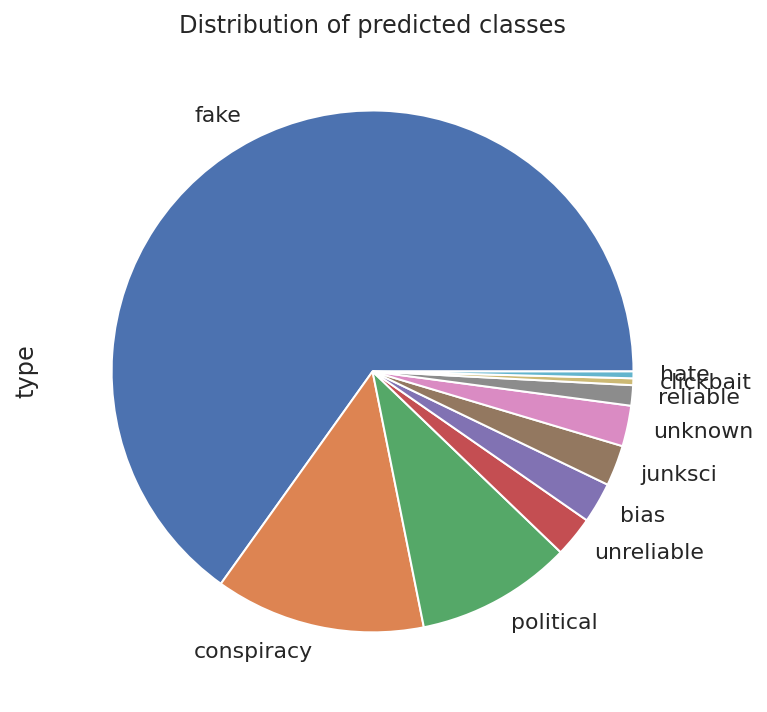

In [14]:
df[label_column].value_counts().plot(kind='pie', title='Distribution of predicted classes');

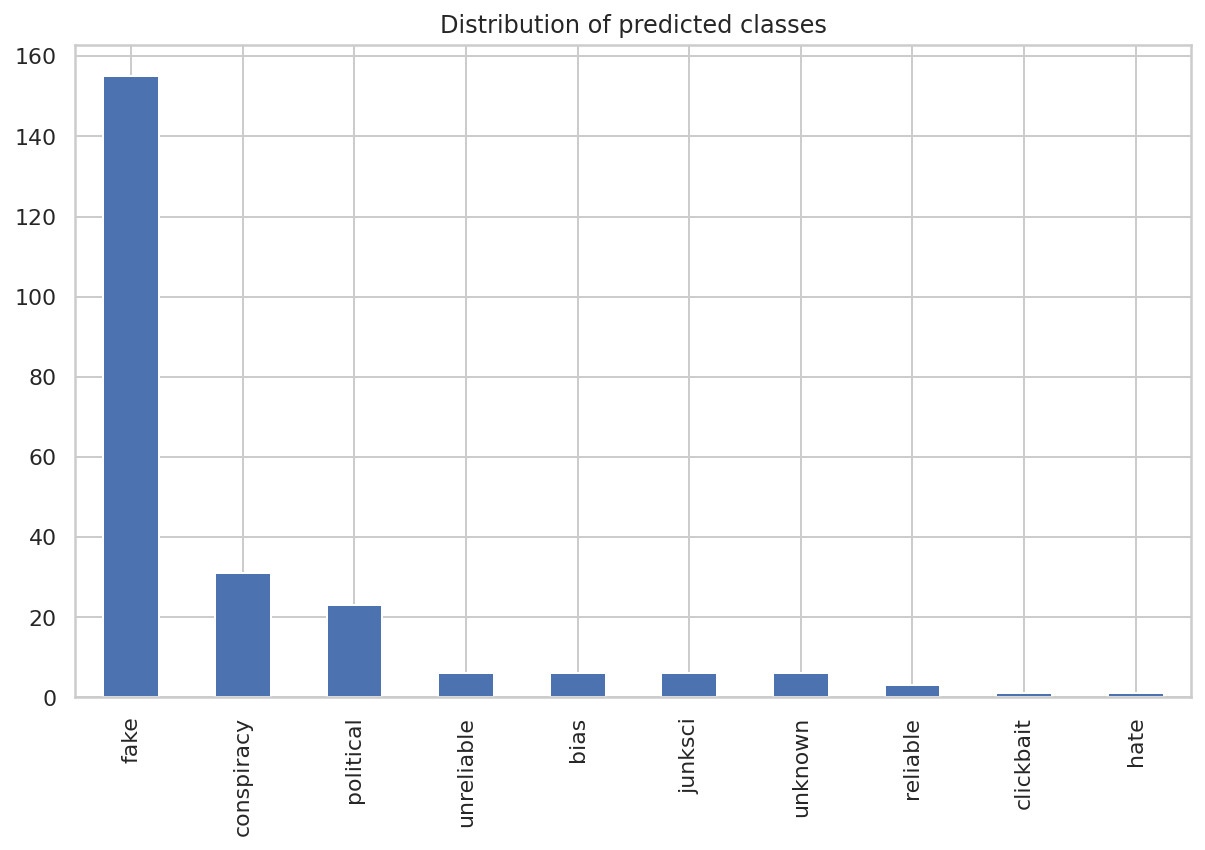

In [15]:
df[label_column].value_counts().plot(kind='bar', title='Distribution of predicted classes');

### Numerical attributes

Analysis of numerical attributes:

In [16]:
analyse_numerical_attributes(df, label_column, numerical_attributes)

There are no attributes to be analysed.


### Categorical attributes

Analysis of categorical attributes:



Analysis of attribute "domain"


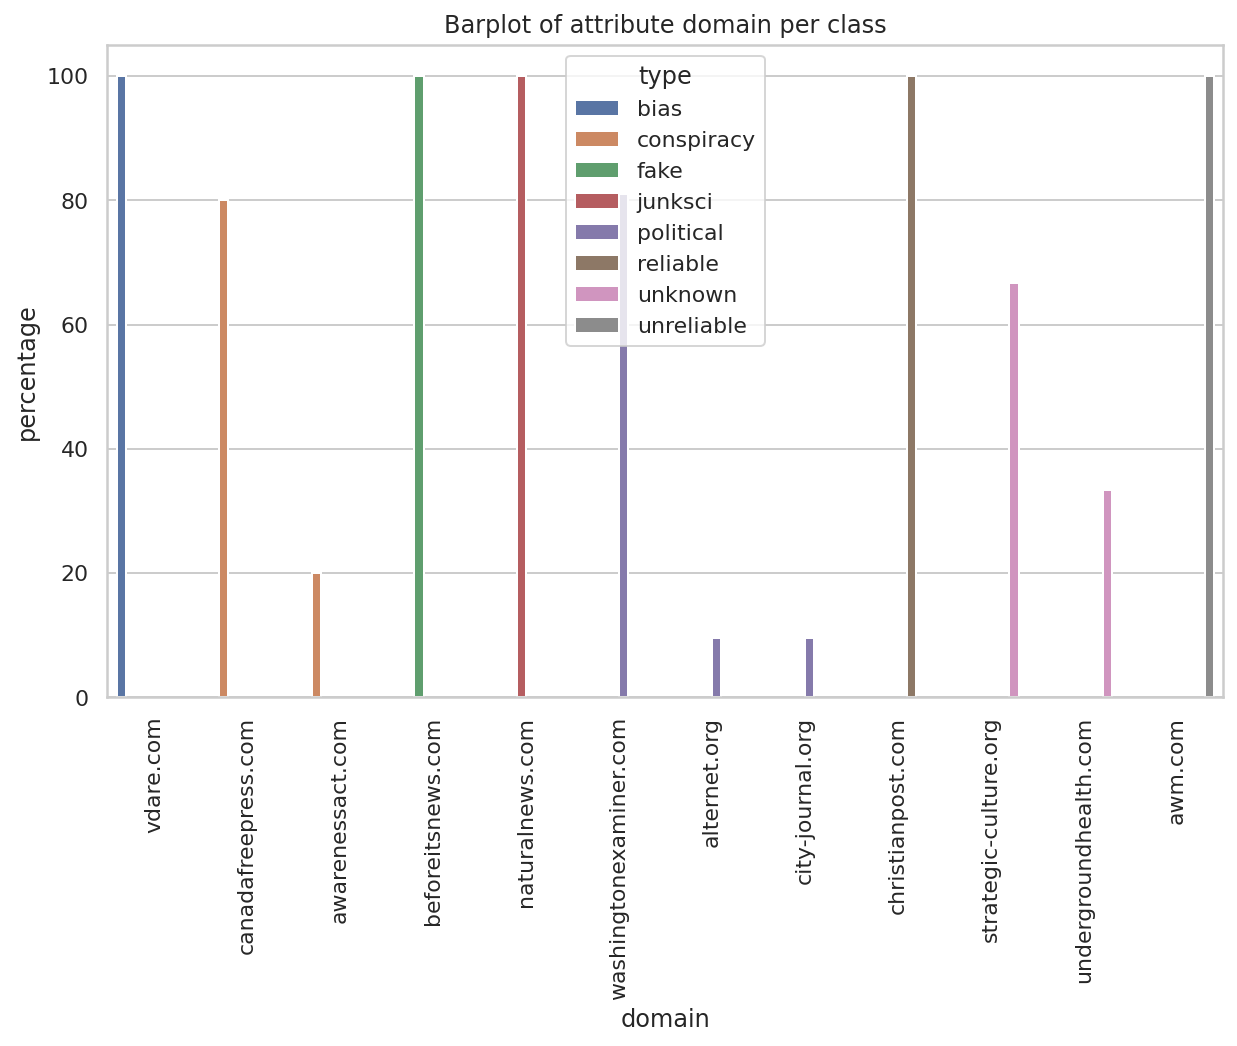

In [17]:
analyse_categorical_attributes(df, label_column, categorical_attributes)

### Textual attributes

Some parts of analysis include preprocessing text. In this case, the following operations are performed:
* removing special characters (only letters are preserved),
* removing tokens shorter than 3 characters,
* removing tokens that are in english stop-words defined by NLTK library,
* removing accent marks from tokens.

Analysis of textual attributes:



Analysis of attribute "url"


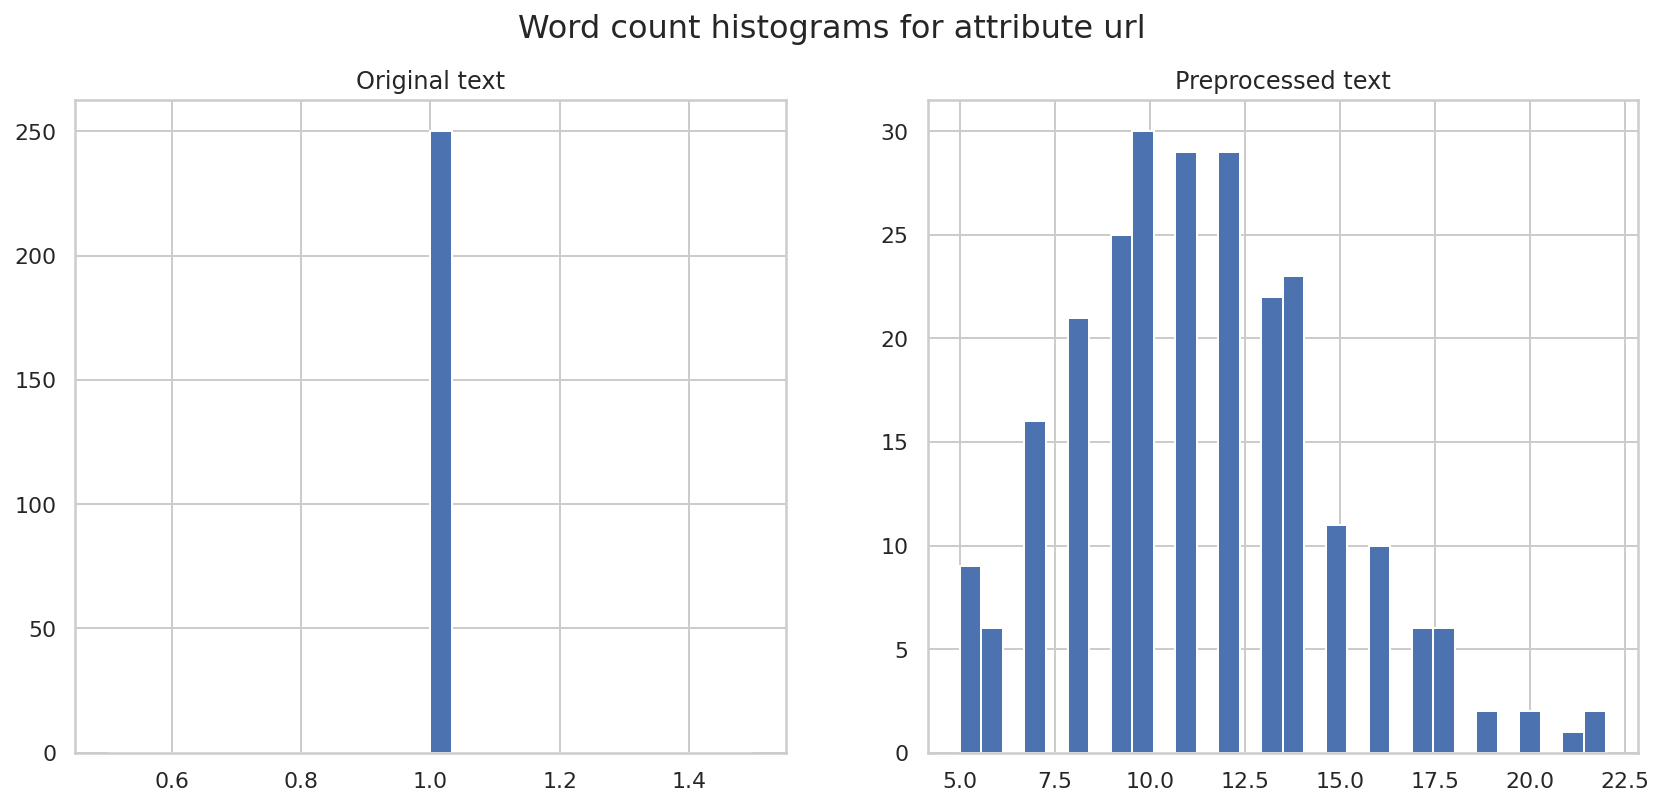

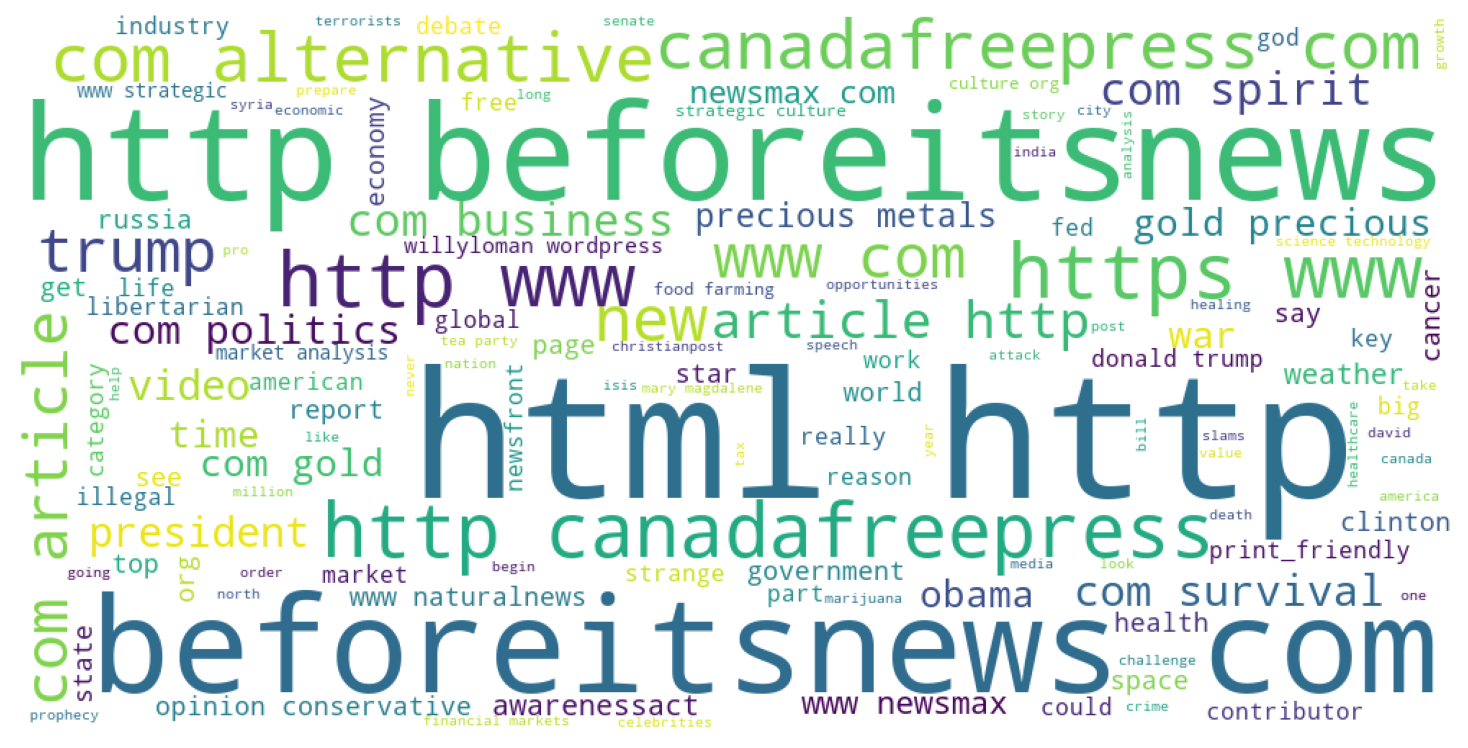



Analysis of attribute "content"


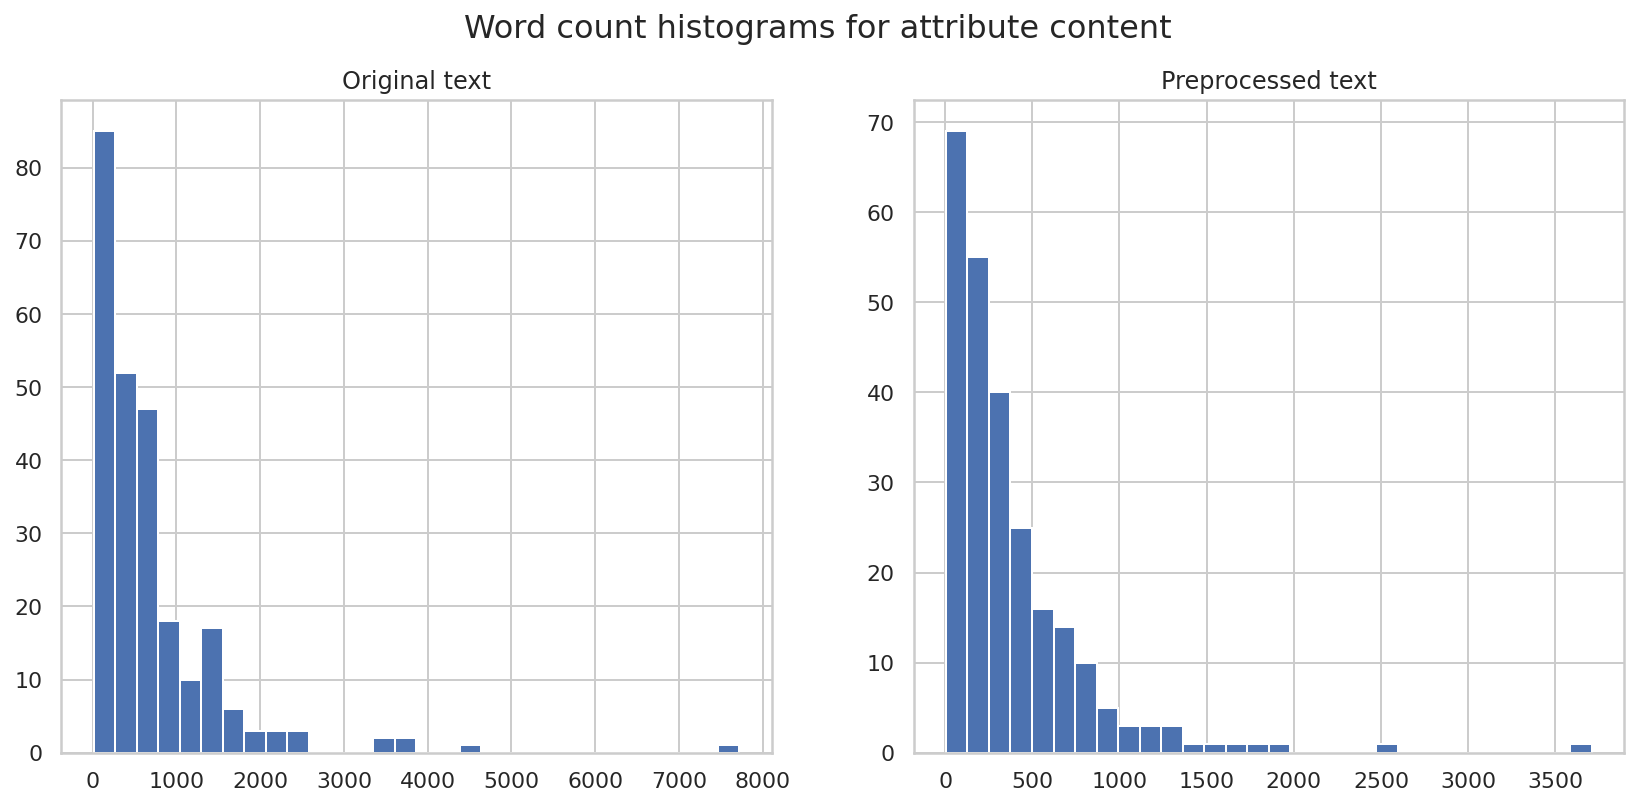

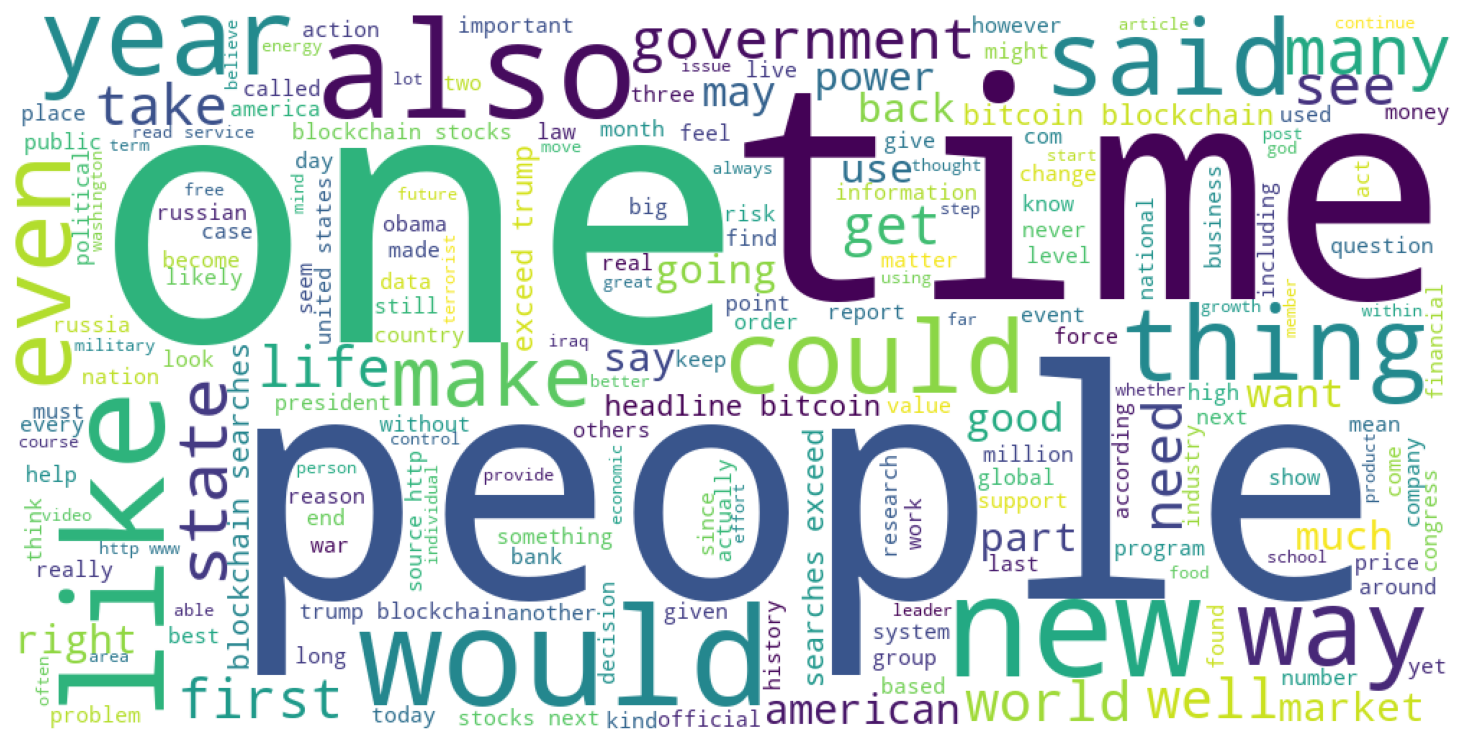



Analysis of attribute "title"


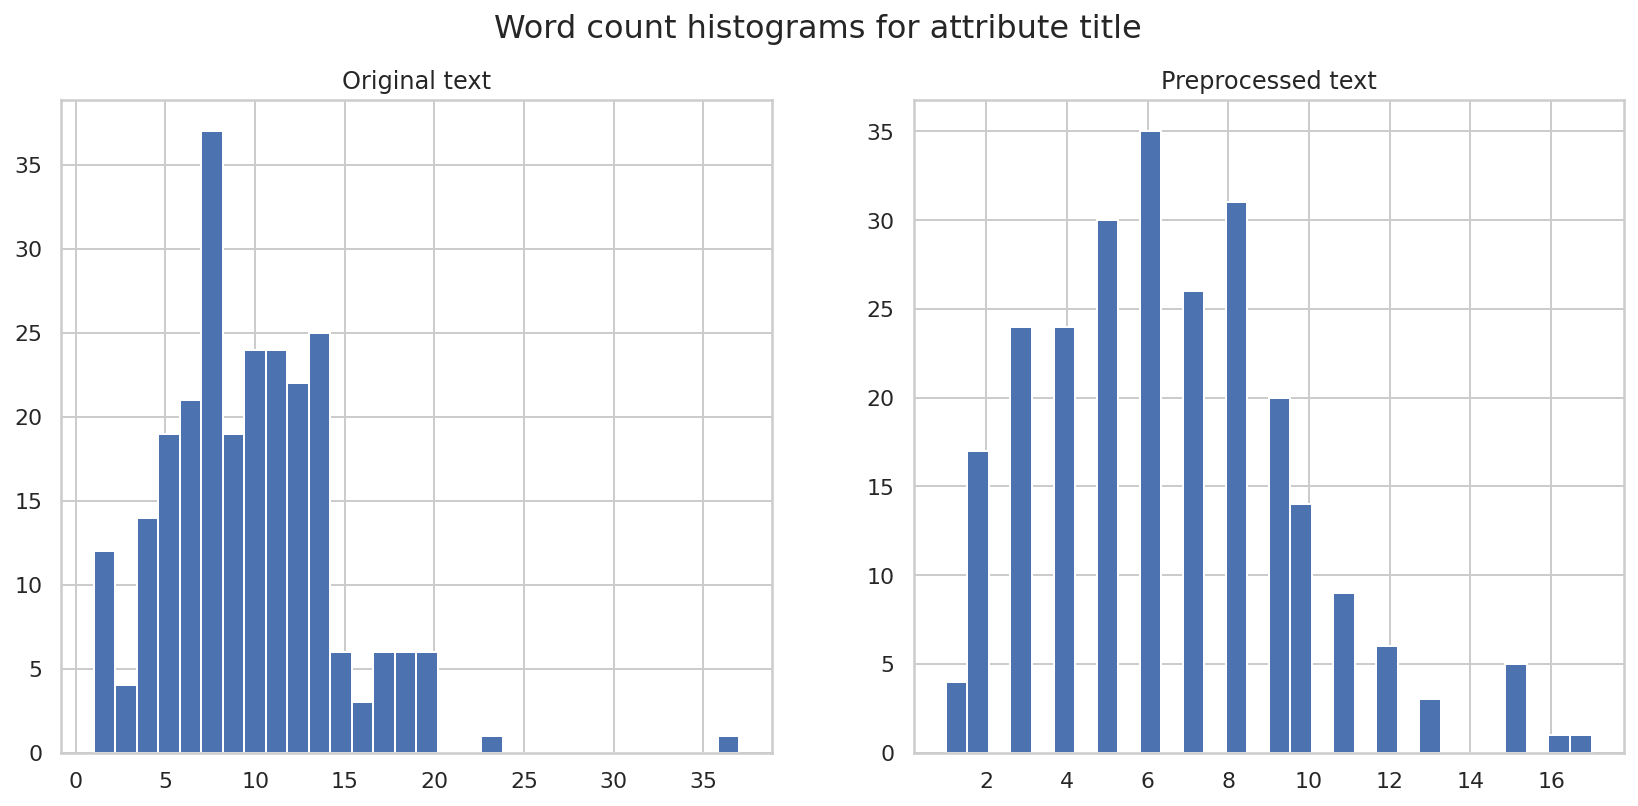

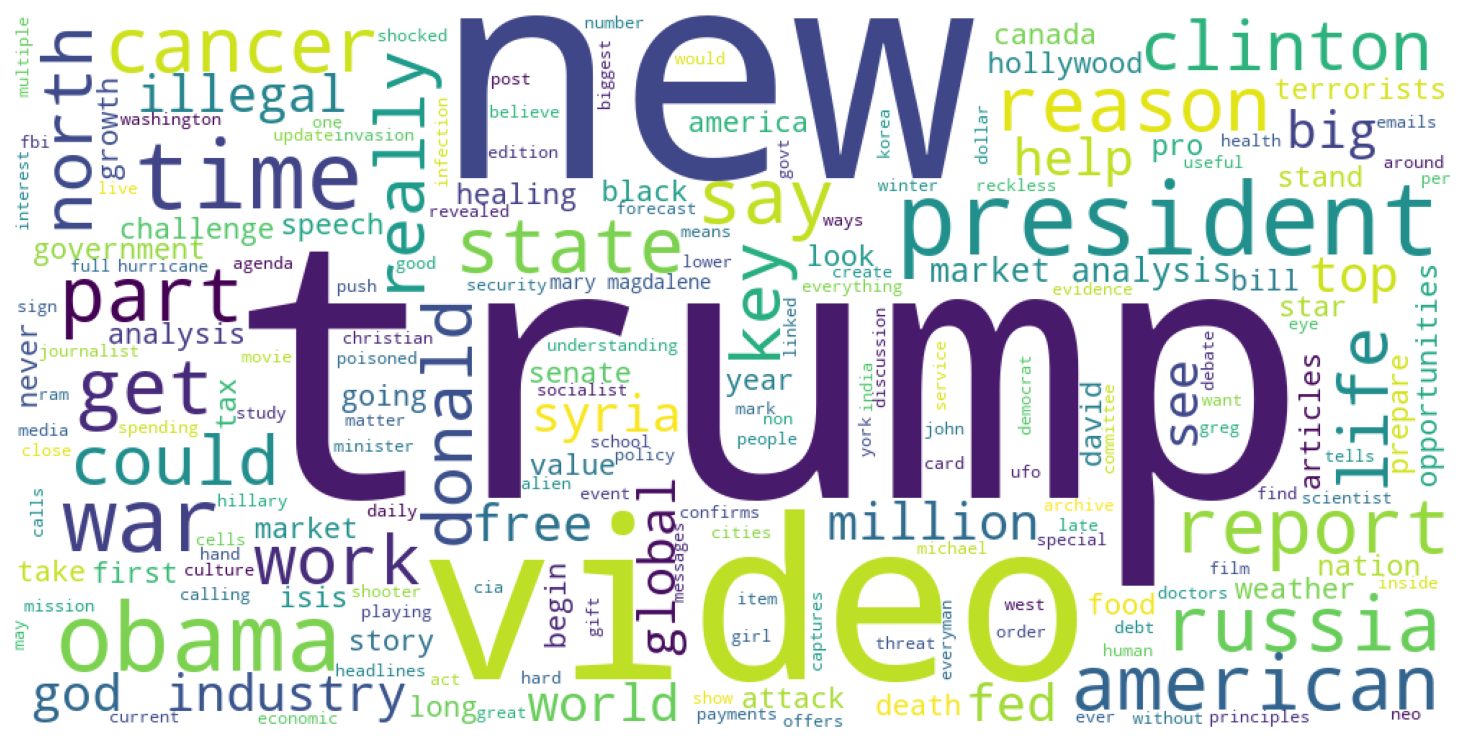



Analysis of attribute "meta_description"


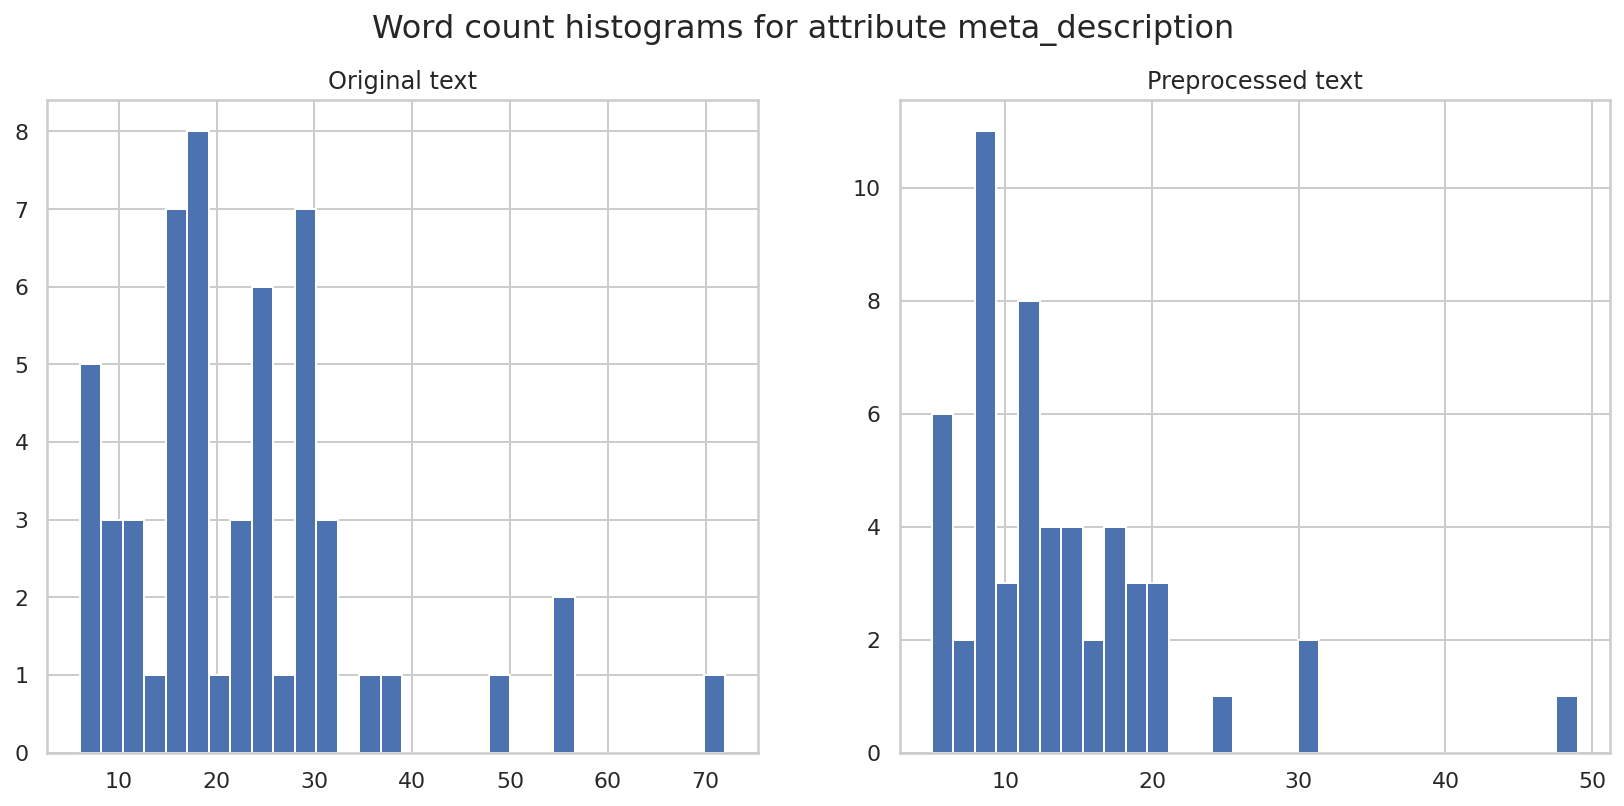

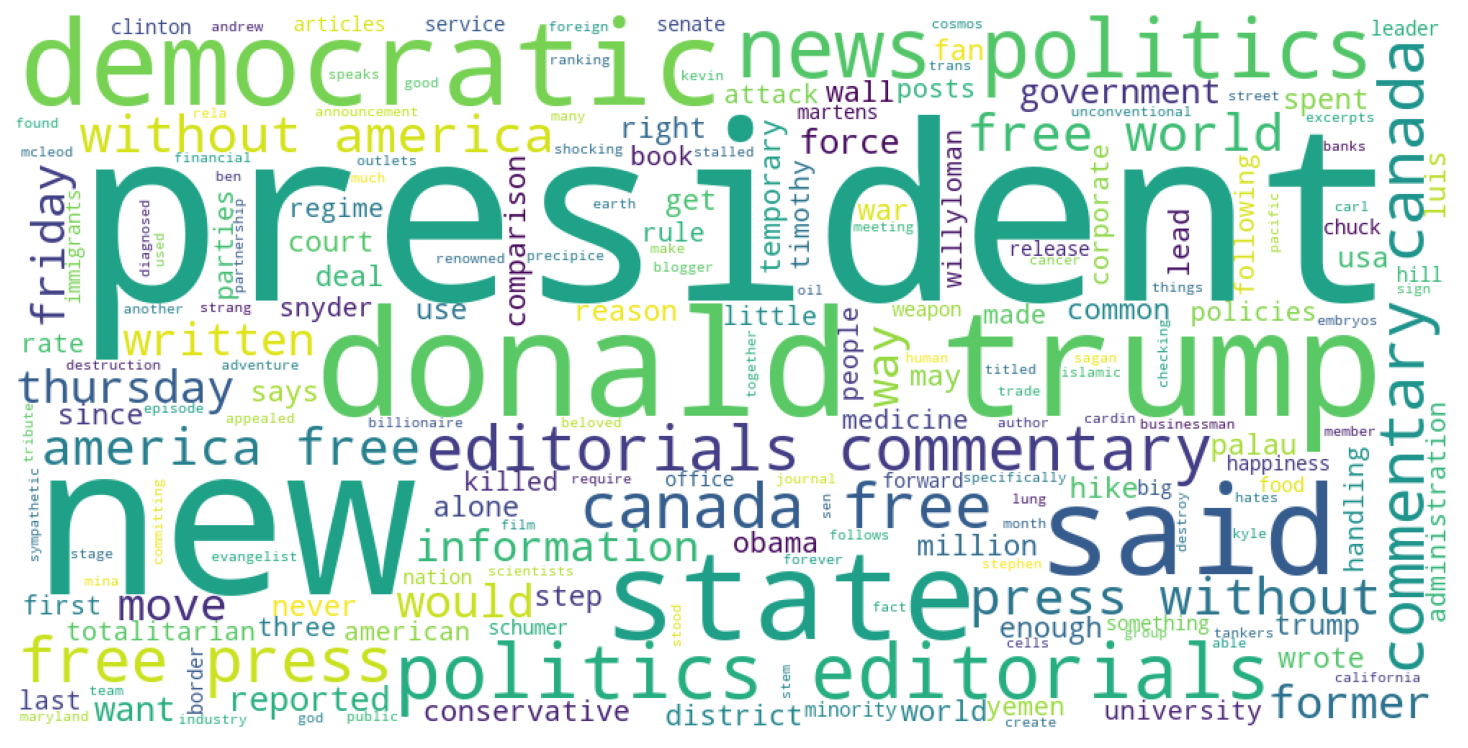



Analysis of attribute "authors"


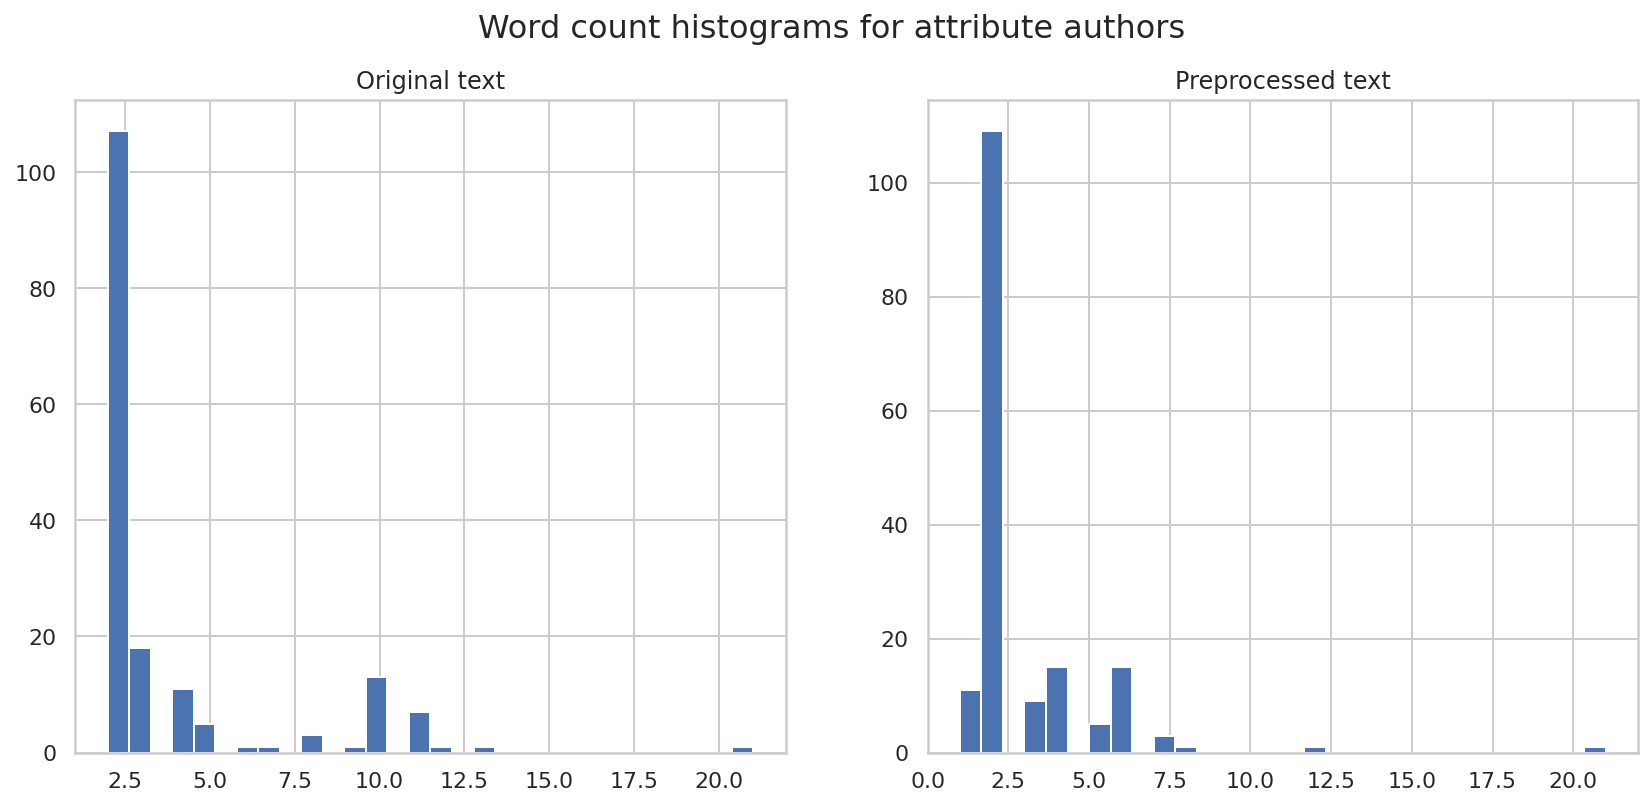

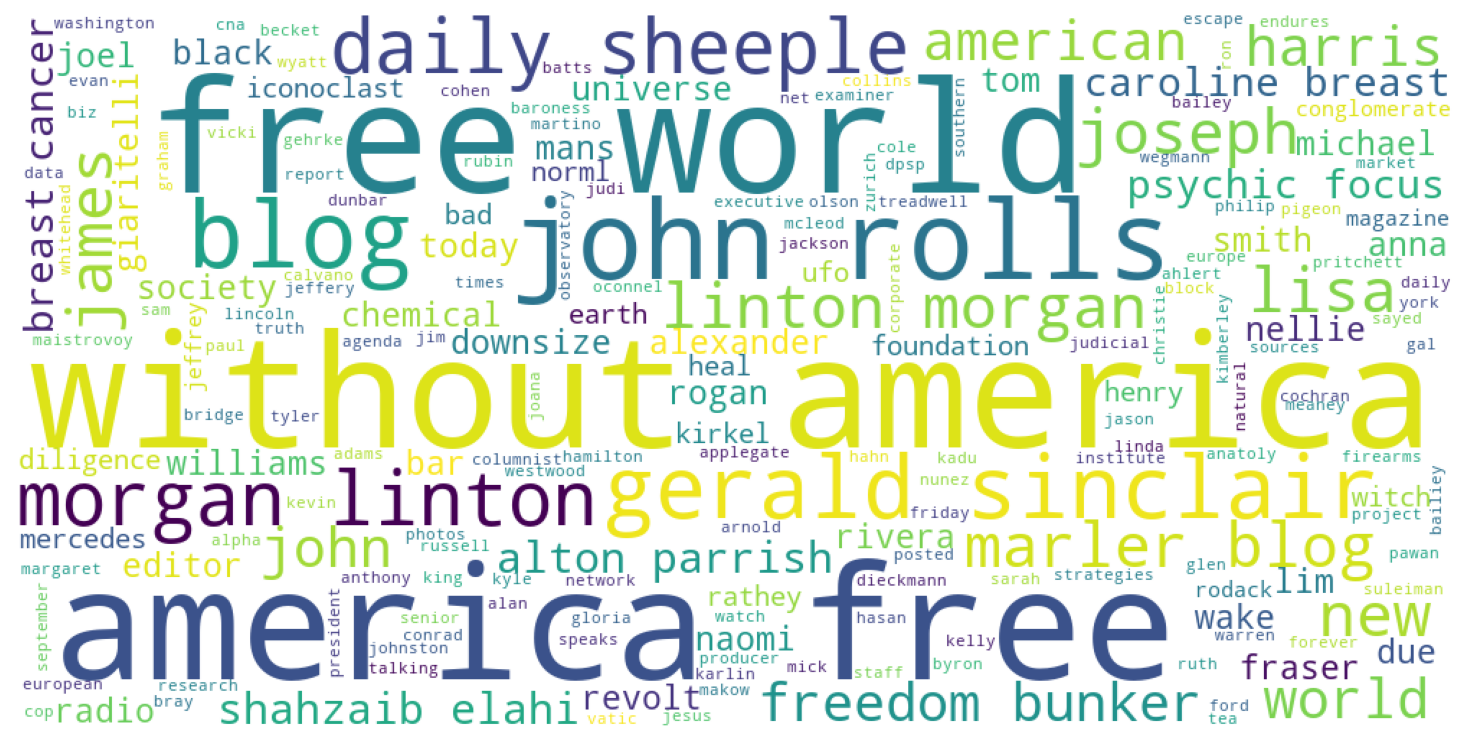

In [18]:
analyse_textual_attributes(df, textual_attributes)

## Pairwise analysis

Pairwise analysis of attributes (numerical attributes):

### Pair analysis

In [19]:
if numerical_attributes and len(numerical_attributes) > 1:
    sns.pairplot(df, vars=numerical_attributes, hue=label_column);

### Correlations

Correlation matrix:

In [20]:
if numerical_attributes and len(numerical_attributes) > 1:
    check_correlations(df, numerical_attributes)